In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
import warnings 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.shape

(200, 5)

In [8]:
df.drop(['CustomerID'], inplace = True, axis = 1)

In [9]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
prof = {"Male":0,'Female':1}
df['Genre'] = df['Genre'].map(prof)

In [12]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [13]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

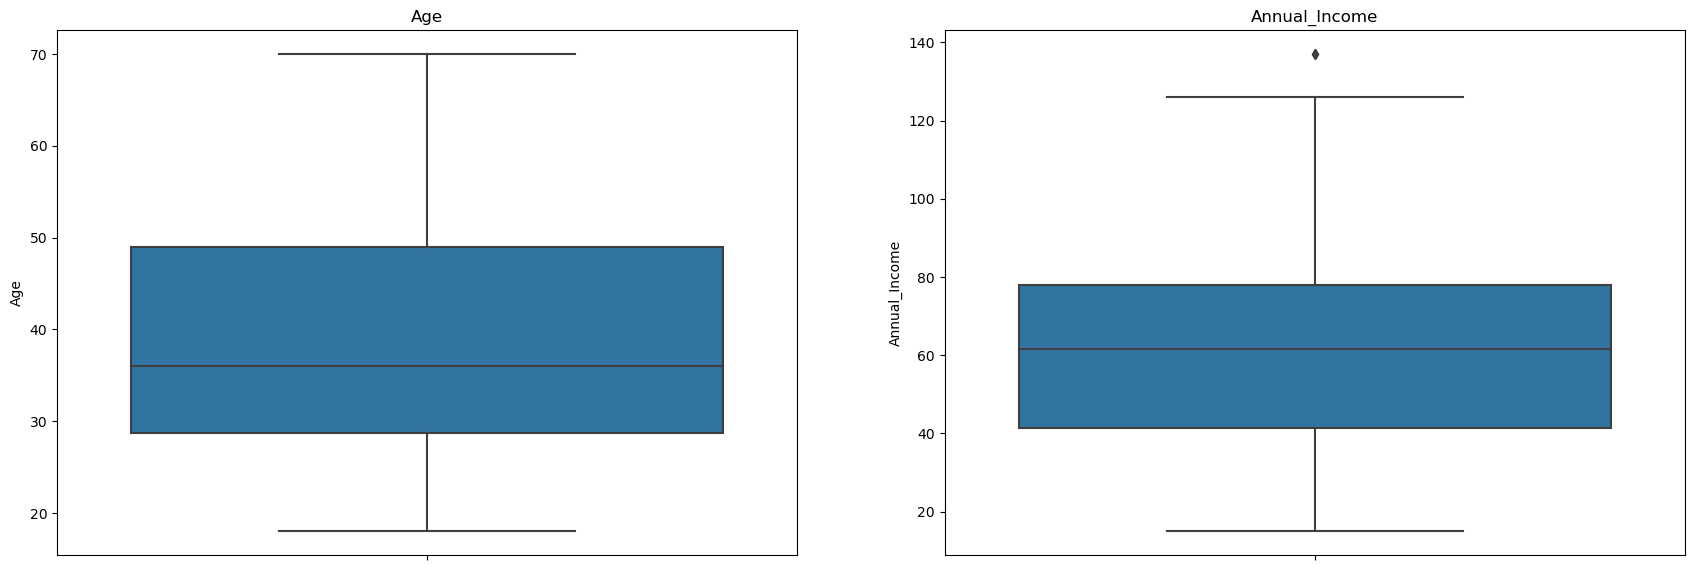

In [14]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=df.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.Annual_Income)
plt.title("Annual_Income")

plt.show()

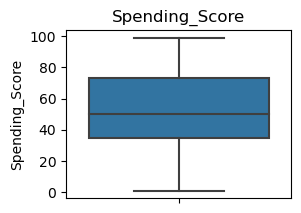

In [15]:
plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.Spending_Score)
plt.title("Spending_Score")
plt.show()

In [16]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Genre,Age,Annual_Income,Spending_Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [21]:
data=scaled[['Age','Annual_Income']]
data.head()

,Age,Annual_Income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


In [22]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(10)

,wcss_score,no_of_clusters
0,400.000000,1
1,250.588116,2
2,132.855304,3
3,103.051518,4
4,81.408191,5
5,67.358905,6
6,54.161256,7
7,48.692261,8
8,41.640921,9
9,37.080115,10


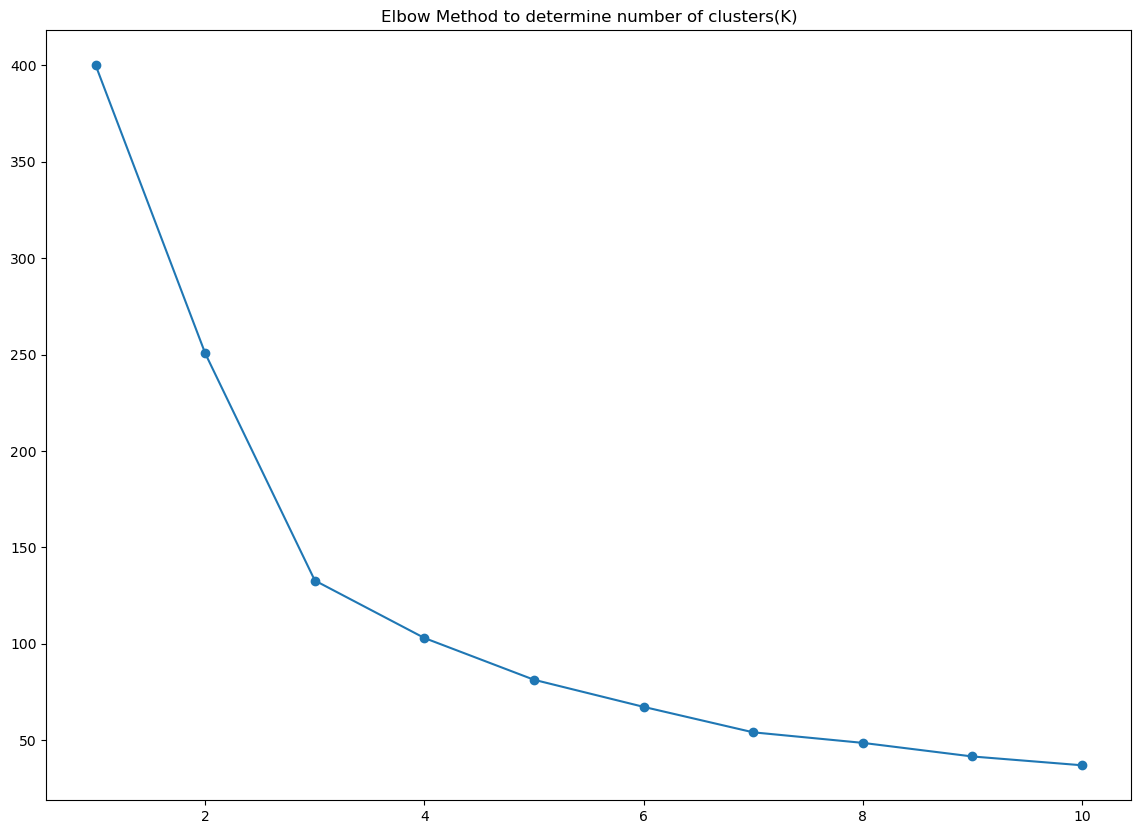

In [23]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K Means Clustering

In [24]:
#Algorithm

kmeans=KMeans(n_clusters=4,random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [25]:
prediction=kmeans.fit_predict(data)
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [26]:
clustered_data = df.copy()
clustered_data["cluster_index"] = prediction

In [27]:
clustered_data

,Genre,Age,Annual_Income,Spending_Score,cluster_index
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,3
196,1,45,126,28,3
197,0,32,126,74,3
198,0,32,137,18,3


<Axes: xlabel='Age', ylabel='Annual_Income'>

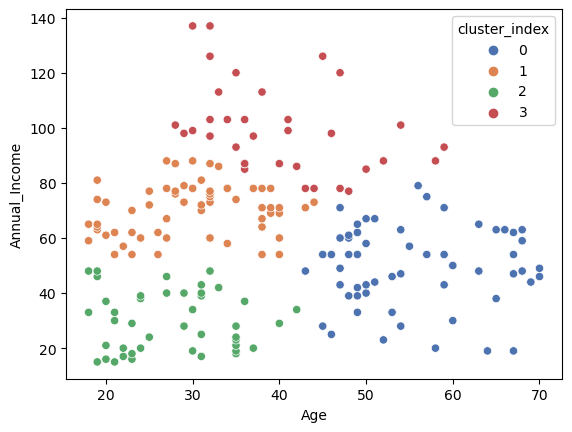

In [29]:
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Annual_Income,
                hue=clustered_data.cluster_index,
                palette="deep")

In [30]:
clustered_data.cluster_index.unique()

array([2, 0, 1, 3])

In [31]:
score = silhouette_score(df, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.246 ~ 0


## Agglomerative Clustering

In [32]:
agc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [33]:
agg_predict_scaled = agc.fit_predict(scaled)
score = silhouette_score(scaled, agc.labels_, random_state=0)
print(score)

0.26322605188202447


In [34]:
agg_predict_data = agc.fit_predict(data)
score = silhouette_score(data, agc.labels_, random_state=0)
print(score)

0.3728063841272187


In [35]:
agg_cluster_scaled = df.copy()
agg_cluster_scaled["cluster_index"] = agg_predict_scaled
agg_cluster_scaled.head()

,Genre,Age,Annual_Income,Spending_Score,cluster_index
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,0


In [36]:
agg_cluster_scaled.cluster_index.unique()

array([1, 0, 3, 2], dtype=int64)

In [37]:
agg_cluster_data = df.copy()
agg_cluster_data["cluster_index"] = agg_predict_data
agg_cluster_data.head()

,Genre,Age,Annual_Income,Spending_Score,cluster_index
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2


<Axes: xlabel='Age', ylabel='Annual_Income'>

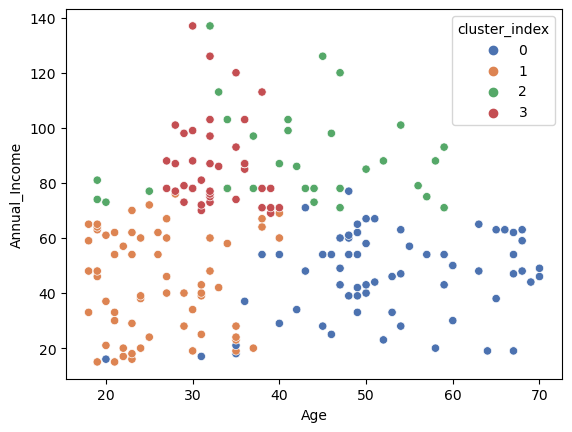

In [39]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_scaled.Age,
                y=agg_cluster_scaled.Annual_Income,
                hue=agg_cluster_scaled.cluster_index,
                palette="deep")

<Axes: xlabel='Age', ylabel='Annual_Income'>

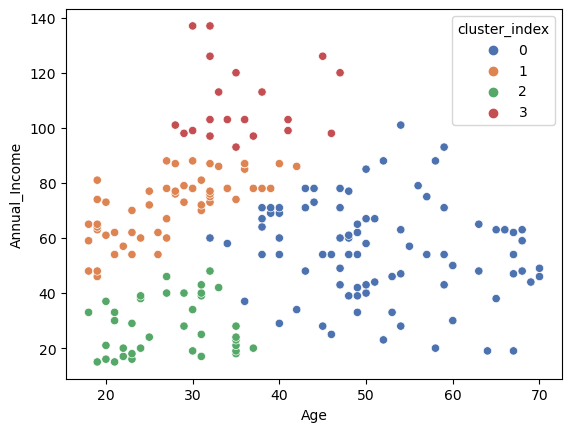

In [41]:
sns.scatterplot(x=agg_cluster_data.Age,
                y=agg_cluster_data.Annual_Income,
                hue=agg_cluster_data.cluster_index,
                palette="deep")

In [42]:
agg_cluster_data.groupby('cluster_index').size()

cluster_index
0    86
1    57
2    37
3    20
dtype: int64